In [37]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop,SGD
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import os
import shutil
import cv2
from pathlib import Path
earlystop = EarlyStopping(patience=10)

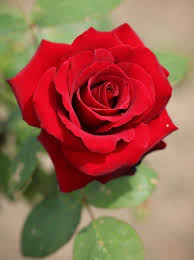

In [ ]:
img = image.load_img('/content/sample_data/training_data/rose_train/0.jpg')
img

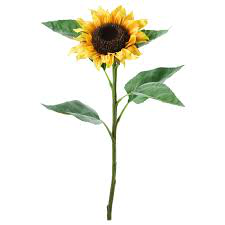

In [ ]:
img = image.load_img('/content/sample_data/training_data/sunflower_train/sunflower0.jpg')
img

In [3]:
#listing type of files in train and testing data
os.listdir("/content/sample_data/Testing_data")

['.ipynb_checkpoints', 'sunflower_test', 'rose_test']

In [4]:
os.listdir("/content/sample_data/train_data")

['.ipynb_checkpoints', 'sunflower_train', 'rose_train']

In [7]:
#dropping .ipynb_checkpoint from training data & testing data
shutil.rmtree("/content/sample_data/Testing_data/.ipynb_checkpoints")

In [8]:
#listing type of files in train and testing data
os.listdir("/content/sample_data/Testing_data")

['sunflower_test', 'rose_test']

In [9]:
os.listdir("/content/sample_data/train_data")

['sunflower_train', 'rose_train']

In [10]:
#image data Generator 

train = ImageDataGenerator(rescale=1/225)#Generate train data of image and scaling it
validation=ImageDataGenerator(rescale=1/225) #Generate validation data of image and scaling it

In [12]:
#Convert training images to data set that pass in NN
#also we can't give multiple size metrix so we also resize our images

#test dataset
train_data = train.flow_from_directory('/content/sample_data/train_data',
                                       target_size = (225,225),
                                       batch_size = 5)

#validation dataset
validation_data = validation.flow_from_directory('/content/sample_data/Testing_data',
                                                 target_size=(225,225),
                                                 batch_size = 5)

Found 121 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


In [13]:
#build Training model

#Reduce LR of GD when point is reach near to Global minima
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


model = tf.keras.models.Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(225,225,3)),
                                   #
                                   Flatten(),
                                   #
                                   Dense(2,activation='sigmoid')])

#Compiling model

model.compile(loss='binary_crossentropy',
            optimizer = 'rmsprop',
            metrics=['accuracy'])

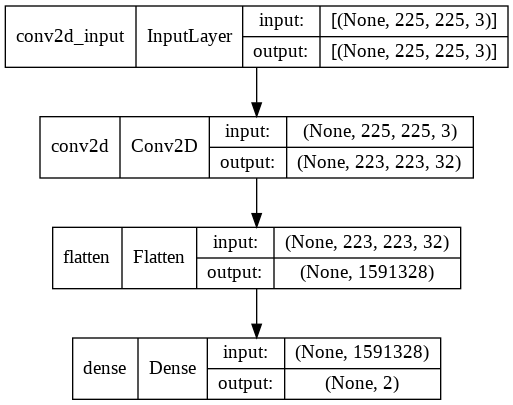

In [14]:
plot_model(model,show_shapes=True)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 32)      896       
                                                                 
 flatten (Flatten)           (None, 1591328)           0         
                                                                 
 dense (Dense)               (None, 2)                 3182658   
                                                                 
Total params: 3,183,554
Trainable params: 3,183,554
Non-trainable params: 0
_________________________________________________________________


In [16]:
training = model.fit(train_data,epochs=10,validation_data=validation_data,steps_per_epoch=5,verbose=1,callbacks=callbacks,validation_steps=5)

Epoch 1/10
5/5 [==============================] - 2s 301ms/step - loss: 38.7669 - accuracy: 0.3200 - val_loss: 1.3555 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 1s 246ms/step - loss: 1.2343 - accuracy: 0.9200 - val_loss: 2.2418 - val_accuracy: 0.7200 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 1s 242ms/step - loss: 0.9892 - accuracy: 0.9200 - val_loss: 5.8128 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 1s 241ms/step - loss: 2.6683 - accuracy: 0.8000 - val_loss: 2.8066 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 1s 243ms/step - loss: 2.4807 - accuracy: 0.7619 - val_loss: 0.4239 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 1s 247ms/step - loss: 1.2807 - accuracy: 0.8800 - val_loss: 0.0874 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 7/10
5/5 [==============================] - 1s 235ms/step - loss: 0.1329 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


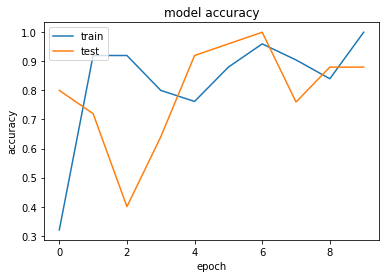

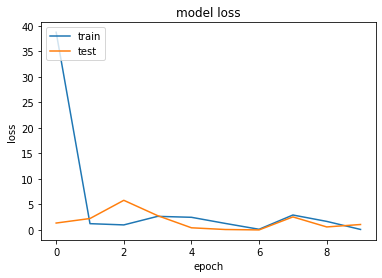

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Try to gain accuracy by optimizing different changes in model layers**

In [19]:
model1 = Sequential()
model1 = Sequential()
model1.add(Conv2D(64,(3,3),input_shape=(225,225,3))) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(64)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(Dropout(0.5))#Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training 
model1.add(Dense(2)) #output layer
model1.add(Activation('sigmoid')) #sigmoid activation function
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 223, 223, 64)      1792      
                                                                 
 activation (Activation)     (None, 223, 223, 64)      0         
                                                                 
 dropout (Dropout)           (None, 223, 223, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 788544)            0         
                                                                 
 dense_1 (Dense)             (None, 64)                50466880  
                                                      

In [20]:

#Compiling model

model1.compile(loss='binary_crossentropy',
            optimizer = 'rmsprop',
            metrics=['accuracy'])

In [21]:
training = model1.fit(train_data,epochs=20,validation_data=validation_data,steps_per_epoch=5,verbose=1,callbacks=callbacks,validation_steps=5)

Epoch 1/20
5/5 [==============================] - 7s 1s/step - loss: 103.6266 - accuracy: 0.5600 - val_loss: 16.6386 - val_accuracy: 0.7200 - lr: 0.0010
Epoch 2/20
5/5 [==============================] - 5s 1s/step - loss: 30.6497 - accuracy: 0.6000 - val_loss: 10.6494 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 3/20
5/5 [==============================] - 5s 1s/step - loss: 20.1719 - accuracy: 0.5200 - val_loss: 0.7653 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 4/20
5/5 [==============================] - 5s 976ms/step - loss: 11.3543 - accuracy: 0.6000 - val_loss: 3.8974 - val_accuracy: 0.6800 - lr: 0.0010
Epoch 5/20
5/5 [==============================] - 5s 1s/step - loss: 3.6665 - accuracy: 0.7600 - val_loss: 0.4158 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 6/20
5/5 [==============================] - 5s 1s/step - loss: 2.5555 - accuracy: 0.6800 - val_loss: 0.3431 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 7/20
5/5 [==============================] - 5s 1s/step - loss: 0.7382 - accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


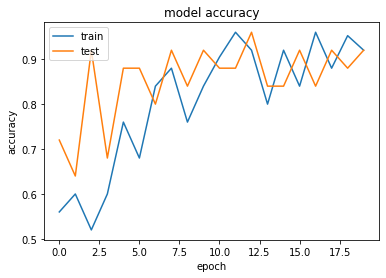

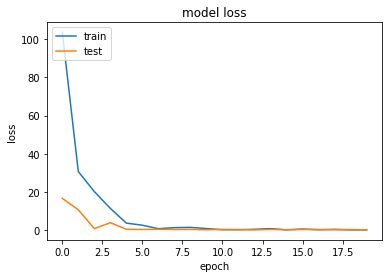

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Trying to gain more accuracy by changing Optimizer**

In [33]:
model1 = Sequential()

model1.add(Conv2D(64,(3,3),input_shape=(225,225,3))) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(Dropout(0.25))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dense(64)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(Dropout(0.25))#Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training 


model1.add(Dense(2)) #output layer
model1.add(Activation('sigmoid')) #sigmoid activation function
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 223, 223, 64)      1792      
                                                                 
 activation_9 (Activation)   (None, 223, 223, 64)      0         
                                                                 
 dropout_6 (Dropout)         (None, 223, 223, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 788544)            0         
                                                                 
 dense_7 (Dense)             (None, 64)                50466880  
                                                      

In [34]:

#Compiling model

model1.compile(loss='binary_crossentropy',
            optimizer = 'SGD',
            metrics=['accuracy'])

In [35]:
training = model1.fit(train_data,epochs=20,validation_data=validation_data,steps_per_epoch=5,verbose=1,callbacks=callbacks,validation_steps=5)

Epoch 1/20
5/5 [==============================] - 4s 726ms/step - loss: 3.3404 - accuracy: 0.5238 - val_loss: 0.6912 - val_accuracy: 0.9200 - lr: 0.0100
Epoch 2/20
5/5 [==============================] - 4s 737ms/step - loss: 0.6895 - accuracy: 0.7600 - val_loss: 0.6870 - val_accuracy: 0.8400 - lr: 0.0100
Epoch 3/20
5/5 [==============================] - 3s 716ms/step - loss: 0.6737 - accuracy: 0.8000 - val_loss: 0.6492 - val_accuracy: 0.7200 - lr: 0.0100
Epoch 4/20
5/5 [==============================] - 3s 728ms/step - loss: 0.5165 - accuracy: 0.8000 - val_loss: 0.5278 - val_accuracy: 0.6800 - lr: 0.0100
Epoch 5/20
5/5 [==============================] - 3s 715ms/step - loss: 0.6150 - accuracy: 0.8000 - val_loss: 0.5859 - val_accuracy: 0.7600 - lr: 0.0100
Epoch 6/20
5/5 [==============================] - 4s 733ms/step - loss: 0.4257 - accuracy: 0.8800 - val_loss: 0.6028 - val_accuracy: 0.6000 - lr: 0.0100
Epoch 7/20
5/5 [==============================] - 4s 748ms/step - loss: 0.5682 - a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


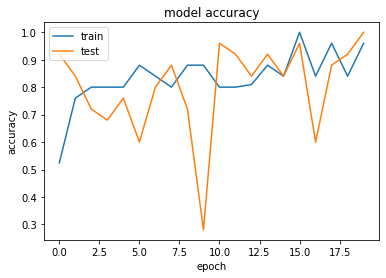

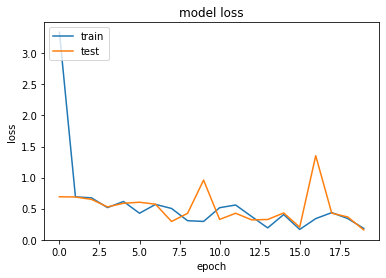

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()